# Don't forget to input your username and password. Each code is tested. If there is some problem, rerun the code with previous conditions. It will work fine. Thank you. Also change driver's path

In [123]:
conda install selenium

13

In [191]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from datetime import date
import time
import matplotlib.pyplot as plt
import csv

In [192]:
import numpy as np
# import pandas as pd

In [193]:
username = "Sample username"
password = "Sample password"

In [212]:
driver = webdriver.Chrome(executable_path = 'chromedriver')
driver.maximize_window()

In [195]:
def login():
#     driver = webdriver.Chrome(executable_path = 'chromedriver')
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys(username)
    driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys(password)
    driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]').click()

In [213]:
login()

# Q1.1 From the list of instagram handles obtained when we searched ‘food’ . Open the first 10 handles and find the top 5 which have the highest number of followers

In [218]:
def insta_handles(name):
    j=0
    first_10 = []
    search = driver.find_element_by_class_name('XTCLo')
    search.clear()
    search.send_keys(name)
    for i in driver.find_elements_by_xpath('//a[@class="yCE8d  "]/div/div[2]/div/span'):
#         print(i.get_attribute('innerHTML'))
        first_10.append(i.get_attribute('innerHTML'))
        j+=1
        if j >9:
            break
    time.sleep(3)
    d={}
    for h in first_10:
        driver.get('https://www.instagram.com/' + h + '/')
        total_following=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title')
        time.sleep(2)
        t=total_following.split(',')
        total_followings=0
        for i in range(len(t)):
            total_followings = total_followings*(10**(3*(len(t)-i))) + int(t[i])
        total_following = total_followings
        d[h] = total_following
    top_5 = sorted(d, key = d.get, reverse = True)[0:5]
    return top_5

In [221]:
# Rerun if no output is displayed. It will work
first_5 = insta_handles('food')

In [222]:
first_5

['yourfoodlab',
 'dilsefoodie',
 'foodtalkindia',
 'food_lunatic',
 'foodyypreneur']

# Q1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [223]:
def posts(handles):
    today = date.today()
    date1 = today.strftime("%d/%m/%Y").split('/')
    day = int(date1[0])
    month = int(date1[1])
    year = int(date1[2])
    d = {}
    for page in handles:
        driver.get('https://www.instagram.com/' + page + '/')
        time.sleep(3)
        num_of_posts = 0
        for z in driver.find_elements_by_xpath('//div[contains(@class, "Nnq7C")]/div/a/div[1]'):
            z.click()
            time.sleep(3)
            times = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,"//body//time[@class='_1o9PC Nzb55']")))
            items1 = times.get_attribute("datetime").split('T')[0].strip().split('-')
            year1 = int(items1[0].strip())
            month1 = int(items1[1])
            day1 = int(items1[2].strip())
            driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            if year1 == year and month1 == month and day1 >= day-3 :
                num_of_posts += 1
            else:
                break
        d[page] = num_of_posts
    return d
        

In [224]:
d = posts(first_5)

In [225]:
d

{'yourfoodlab': 1,
 'dilsefoodie': 5,
 'foodtalkindia': 2,
 'foodyypreneur': 7,
 'food': 3}

# Q1.3 Depict this information using a suitable graph.

In [226]:
def posts_graph(d):
    pages = []
    posts = []
    for i in d:
        pages.append(i)
        posts.append(d[i])
    plt.bar(pages,posts,width = 0.4, color = "green", edgecolor = "yellow")
    plt.xticks(rotation = 90)
    plt.ylabel("Number of Posts",color = "red")
    plt.xlabel("Name of Handles",color = "red")
    plt.show()

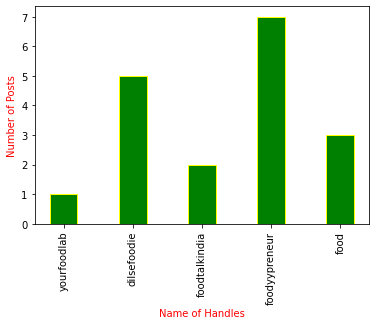

In [227]:
posts_graph(d)

# Q2.1 Open the 5 handles obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [228]:
def posts(handles):
    content=[]
    hashtags=[]
    for page in handles:
        driver.get('https://www.instagram.com/' + page + '/')
        time.sleep(3)
        count = 0
#         for z in driver.find_elements_by_xpath('//div[contains(@class, "Nnq7C")]/div/a/div[1]'):
#             z.click()
        for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
            i.click()
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
            content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
            for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
                hashtags.append(hashes.get_attribute('innerHTML'))
            count+=1
            if count>=10:
                driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
                break
            driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            time.sleep(1)
    return content,hashtags

In [108]:
# len(content)

50

In [229]:
content,hashtags = posts(first_5)

In [230]:
for i in content:
    print(i)
    print("===========================================================================")

Soya Chaap Makhani by Chef @sanjyotkeer...Tandoori chaap in Makhani gravy just is a delicious, perfect dish. It’s a great option for peeps who are vegetarian but want to try something really close to a butter chicken (Yes I love butter chicken and I would never compare it to anything, but yes this one just tasted amazing, NO CONTROVORSIES PLEASE😋) Off lately I have cooked a few versions of the soya chaap and this one is surely one of the top recipes. You also will learn how to cook some tandoori chaap, but for that I will do a detailed recipe soon.Until then cook some chaap Makhani and pair it with some crispy naan and enjoy this delicious recipe!....#recipe #foodie #comfortfood #streetfood #indiancuisine #sanjyotkeer #soyachaap
New recipe is out now!! Soya Chaap Makhani Recipe is out now on Facebook and YouTube!!! Tandoori chaap in Makhani gravy just is a delicious, perfect dish. It’s a great option for peeps who are vegetarian but want to try something really close to a butter chicke

# Q2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [231]:
# ASSUMPTION ----->  calculating frequency of hashtag because calculating freqeuncy of each words is meaningless

def count_hashtag(hashtags):
    hashtags=np.array(hashtags)
    hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
    for i in hashtags:
        if not i[0]=='@' and i!='':
            hash_tags.append(i)
    dic_fre=dict()#this will store the frequencies of all the hashtags
    for i in hash_tags:
        dic_fre[i] = dic_fre.get(i,0)+1
    return dic_fre

In [232]:
h_fre = count_hashtag(hashtags)

In [233]:
h_fre

{'#recipe': 5,
 '#foodie': 12,
 '#comfortfood': 2,
 '#streetfood': 9,
 '#indiancuisine': 5,
 '#sanjyotkeer': 8,
 '#soyachaap': 2,
 '#recipes': 4,
 '#food': 9,
 '#foodporn': 18,
 '#deliciousfood': 1,
 '#mumbaifoodie': 2,
 '#mumbaistreetfood': 2,
 '#cooking': 1,
 '#foodiesofinstagram': 4,
 '#indianfood': 12,
 '#yourfoodlab': 1,
 '#foodphotography': 14,
 '#sheera': 2,
 '#recipeoftheday': 2,
 '#yummy😋😋': 1,
 '#sweetdish': 1,
 '#breakfastideas': 2,
 '#sweetlover': 1,
 '#pineapple': 1,
 '#instadaily': 2,
 '#mutton': 1,
 '#muttonrecipes': 1,
 '#yummyfood': 1,
 '#india_ig': 1,
 '#pakora': 2,
 '#paneer': 1,
 '#masala': 1,
 '#paneerrecipes': 1,
 '#pakoras': 1,
 '#foodstagram': 3,
 '#kholapuri': 1,
 '#dilsefoodie': 10,
 '#reelkarofeelkaro': 2,
 '#chowmein': 1,
 '#princechaatbhandaar': 1,
 '#ARAKUTasteTest': 1,
 '#arakucoffee': 1,
 '#specialitycoffee': 1,
 '#tastetest': 1,
 '#makeyourpick': 1,
 '#coffee': 1,
 '#coffeelover': 1,
 '#coffeelove': 1,
 '#coffeelife': 1,
 '#coffeeconnoisseurs': 1,
 '#co

# Q2.3 Create a csv file with two columns : the word and its frequency

In [234]:
def create_csv(dic):
    with open('test.csv', 'w', encoding="utf-8") as f:
        for key in h_fre.keys():
            f.write("%s,%s\n"%(key,h_fre[key]))
#     hash_word=np.array([i[1:] for i in dic.keys()])
#     frequency=np.array([i for i in dic.values()])
#     df=pd.DataFrame()
#     df['Words']=hash_word
#     df['Frequency']=frequency
#     df.to_csv('Hashtag_Frequencies.csv')

In [235]:
create_csv(h_fre)

# Q2.4 Now, find the hashtags that were most popular among these bloggers

In [236]:
# for most popular hashtag, I'll be displaying top 10 tags
def most_pop_hashtags(h_fre):
    qwerty = {}
    asdf=0
    for k,v in sorted(h_fre.items(), key=lambda item: item[1], reverse = True):
        qwerty[k] = v
        asdf+=1
        if asdf > 9:
            break
    return qwerty

In [237]:
qwerty = most_pop_hashtags(h_fre)

In [238]:
print("top 10 hashtags that were most popular among these bloggers are:")
qwerty

top 10 hashtags that were most popular among these bloggers are:


{'#foodporn': 18,
 '#foodphotography': 14,
 '#foodie': 12,
 '#indianfood': 12,
 '#foodblogger': 12,
 '#Picoftheday': 11,
 '#dilsefoodie': 10,
 '#dfordelhi': 10,
 '#streetfood': 9,
 '#food': 9}

# Q2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [263]:
def q2_chart(qwerty):
    x_a=[]
    y_a=[]
    countt=0
    for k,v in qwerty.items():
        x_a.append(k)
        y_a.append(v)
        if countt>3:
            break
        countt+=1
    plt.figure(figsize=(10, 10))
    plt.pie(y_a, labels=x_a, autopct='%.2f%%', shadow=True, labeldistance=1.2)
    plt.title('Pie Chart of the top 5 hashtags ')
    plt.show()

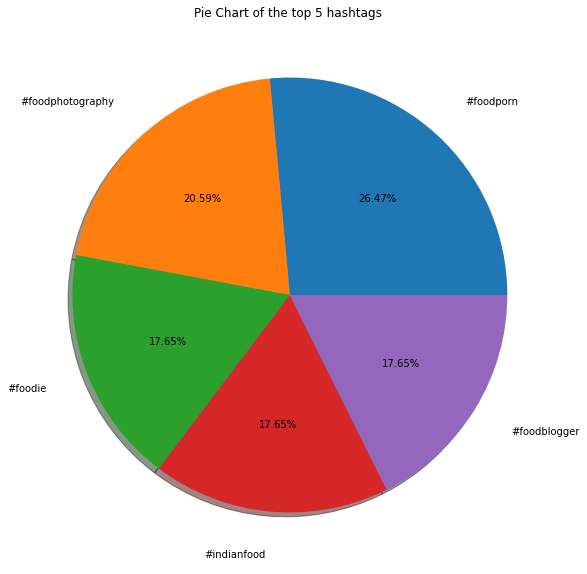

In [264]:
q2_chart(qwerty)

# Q3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [265]:
def likes_p(handles):
    like=[]
    for page in handles:
        driver.get('https://www.instagram.com/' + page + '/')
        time.sleep(3)
        count=0
        likes=0
        for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
            i.click()
            #clicks on the post of the user being iterated.
            try:
                WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/span/span')))
                likes+=int("".join(driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/span/span').get_attribute('innerHTML').split(',')))
            except TimeoutException:
                WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span')))
                likes+=int("".join(driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span').get_attribute('innerHTML').split(',')))
            count+=1
            if count>=10:
                driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
                break
            driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            time.sleep(1)
        like.append(likes)
    return like

In [266]:
likes_list = likes_p(first_5)

In [267]:
likes_list

[1845809, 417390, 24489, 52779, 16293]

# Q3.2 Calculate the average likes for a handle.

In [268]:
def avg_like(likes_list):
    avrg_like=[]
    for i in likes_list:
        avrg_like.append(i/10)
    return avrg_like

In [278]:
avrg_like=avg_like(likes_list)
print("Average like per post")
print(avrg_like)

Average like per post
[184580.9, 41739.0, 2448.9, 5277.9, 1629.3]


# Q3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [283]:
def ratio(first_10):
    fot5=[]
    for page in first_10:
        driver.get('https://www.instagram.com/' + page + '/')
        time.sleep(3)
        fot5.append(int("".join(driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title').split(','))))
    ans=[]
    for i in fot5:
        print(i)
    for i in range(5):
        ans.append(fot5[i]/avrg_like[i])
#     print(fot5)
    return ans

In [284]:
# avg follower / like
print("followers = ")
ans = ratio(first_5)
print("no. of followers/avg. likes = ")
ans

followers = 
1400946
615100
302295
94174
84196
no. of followers/avg. likes = 


[7.589875225443153,
 14.736816885886102,
 123.4411368369472,
 17.843081528638287,
 51.67617995458173]

# Q3.4 Create a bar graph to depict the above obtained information.

In [286]:
def q3_graph(first_10,ans):
    plt.figure(figsize=(10,7))
    plt.bar(first_10, ans, color='orange')
    plt.xticks(rotation=45, size=12)
    plt.xlabel('Users---->', size=12)
    plt.ylabel('Average followers to likes ratio---->', size=12)
    plt.yticks(size=12)
    plt.grid()
    plt.show()

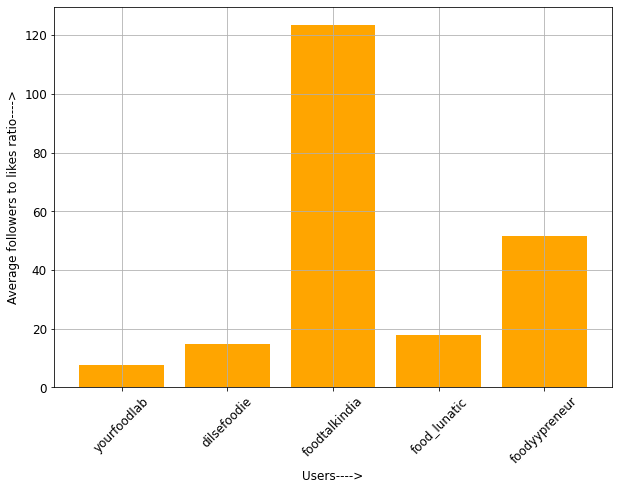

In [287]:
q3_graph(first_5,ans)